<a href="https://colab.research.google.com/github/greebo3661/UI/blob/main/%D0%9D%D0%B5%D0%B9%D1%80%D0%BE_%D0%BA%D0%BE%D0%BD%D1%81%D1%83%D0%BB%D1%8C%D1%82%D0%B0%D0%BD%D1%82_%D0%B4%D0%BE%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%BD%D1%8B%D0%B9_%D0%BD%D0%B0_%D0%B1%D0%B0%D0%B7%D0%B5_%D0%B7%D0%BD%D0%B0%D0%BD%D0%B8%D0%B9_%7C_%D0%A3%D0%98%D0%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Что такое чанки и для чего они нужны




"Чанки" (от английского "chunks") - это термин, который в программировании и обработке данных обычно обозначает небольшие блоки данных. Так что основная цель использования чанков - это обработка больших объемов данных более эффективно и управляемо.

При дообучении ChatGPT у нас обычно есть большая база знаний, которая больше, чем то, что ChatGPT может одновременно обработать. Нам нужно, чтобы ChatGPT могла найти ответ на конкретный вопрос в этой базе знаний, не читая её целиком. Вот здесь нам помогают LangChain и чанки.

Чанки - это как кусочки или страницы этой книги. Они помогают разделить всю книгу на меньшие части. Мы можем использовать только те кусочки, которые нужны нам в данный момент, не беспокоясь о том, что они превысят предел, который может обработать ChatGPT. Таким образом, чанки помогают нам управлять большими текстами, не затрачивая лишние ресурсы.

Можно разбить текст на чанки при помощи самописной функции, например, вот такой:

In [ ]:
def split_text_into_chunks(text, chunk_size):
    # Делим текст на чанки по заданному размеру
    return [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]

In [ ]:
example_text = """ Для множества задач обработки естественного языка (таких как извлечение именованных сущностей, вопросно-ответные системы и т.д.)
куда эффективнее и экономичнее использовать частичный синтаксический анализ (shallow parsing), нежели полный, так как он не предполагает обработки предложения целиком,
выявления отношения между всеми частями предложения.><
Текстовый чанкинг - это один из методов частичного парсинга. Он заключается в разбиение текста на краткие фрагменты, так, что синтаксически связанные слова
становятся членами одной группы. Эти фразы довольно грубые, не пересекающиеся, что означает, что одно слово может быть членом только одного чанка,
группы так же не могут быть вложены друг в друга."""

In [ ]:
# в результате мы получаем несколько чанков (отрезков текста) заданного нами в параметре chunk_size размера:
chunk_size = 100

chunks= split_text_into_chunks(example_text, chunk_size)
chunks

[' Для множества задач обработки естественного языка (таких как извлечение именованных сущностей, вопр',
 'осно-ответные системы и т.д.)\nкуда эффективнее и экономичнее использовать частичный синтаксический а',
 'нализ (shallow parsing), нежели полный, так как он не предполагает обработки предложения целиком,\nвы',
 'явления отношения между всеми частями предложения.><\nТекстовый чанкинг - это один из методов частичн',
 'ого парсинга. Он заключается в разбиение текста на краткие фрагменты, так, что синтаксически связанн',
 'ые слова\nстановятся членами одной группы. Эти фразы довольно грубые, не пересекающиеся, что означает',
 ', что одно слово может быть членом только одного чанка,\nгруппы так же не могут быть вложены друг в д',
 'руга.']

В этом примере, text - это строка текста, которую вы хотите разбить на чанки, а chunk_size - это размер каждого чанка. Функция возвращает список строк, каждая из которых является чанком текста заданного размера.

Этот метод прост, но он не учитывает границы слов или предложений. Если вам нужно разбить текст на чанки так, чтобы они не разрывали предложения, вам потребуется более сложная функция, которая бы учитывала границы предложений.

# Сплиттеры и их отличия.

Сплиттеры являются инструментами, используемыми в обработке естественного языка или в других текстовых анализах, которые помогают разбивать большие тексты на меньшие сегменты, так называемые "чанки".

**CharacterTextSplitter** - это один из инструментов, который разбивает входной текст на чанки (или куски) определенного размера, разделенные указанным разделителем.

CharacterTextSplitter имеет следующие параметры:

* *separator* - это символ или строка, используемые для разделения текста на чанки. Например, может использоваться символ новой строки ("\n").

* *chunk_size* - это максимальное количество символов, которые могут быть в каждом чанке.

* *chunk_overlap* - это количество символов, которые будут перекрываться между соседними чанками. Например, если указать значение 0, это означает, что нет перекрытия между чанками.

То есть, CharacterTextSplitter принимает текст и разбивает его на чанки с учетом указанных параметров. Давайте посмотрим, как он работает:
Это самый простой метод, который разбивает текст на основе символов (по умолчанию «\n\n») и измеряет длину фрагмента по количеству символов.


In [ ]:
!pip install -q langchain_core langchain-openai

In [ ]:
# делим текст на чанки по разделителю "><"
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(
    separator = "><",
    chunk_size = 350,
    chunk_overlap  = 0
)

In [ ]:
CTS_chanks=text_splitter.split_text(example_text)
for chunk in CTS_chanks:
    print(chunk)
    print("-----")

Для множества задач обработки естественного языка (таких как извлечение именованных сущностей, вопросно-ответные системы и т.д.)
куда эффективнее и экономичнее использовать частичный синтаксический анализ (shallow parsing), нежели полный, так как он не предполагает обработки предложения целиком,
выявления отношения между всеми частями предложения.
-----
Текстовый чанкинг - это один из методов частичного парсинга. Он заключается в разбиение текста на краткие фрагменты, так, что синтаксически связанные слова
становятся членами одной группы. Эти фразы довольно грубые, не пересекающиеся, что означает, что одно слово может быть членом только одного чанка,
группы так же не могут быть вложены друг в друга.
-----


In [ ]:
len(CTS_chanks)

2

"Chunk overlap" в контексте обработки данных относится к ситуации, когда части данных или "куски" (chunks) частично перекрываются друг с другом. Это может быть использовано для обеспечения непрерывности и полноты данных при их обработке в разных частях. Вот как это можно представить:

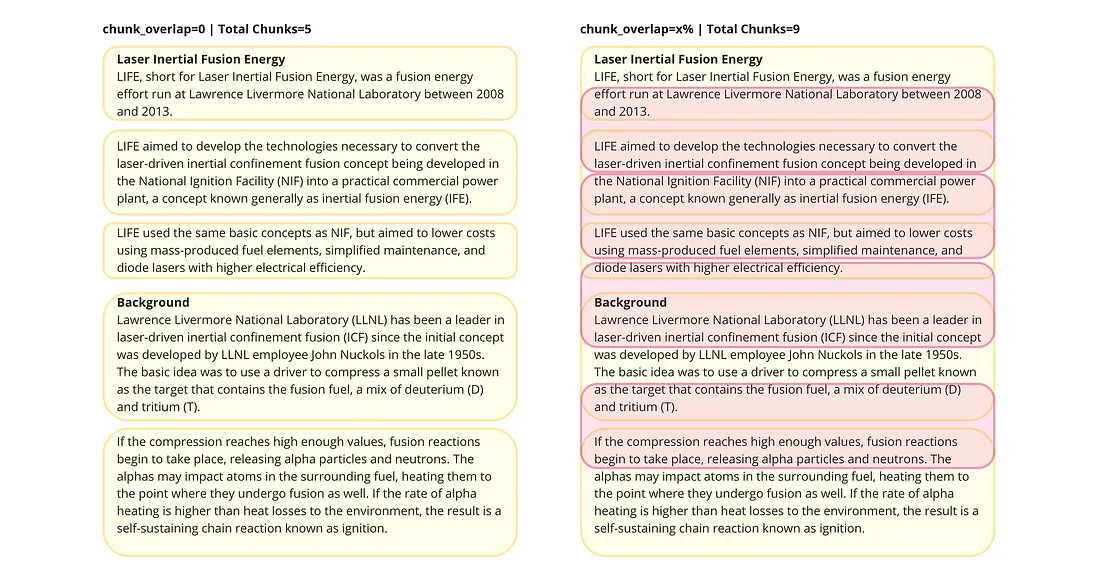

**RecursiveCharacterTextSplitter** - это класс в библиотеке langchain, который предназначен для разделения текста на фрагменты или "чанки". Этот класс наследуется от базового класса TextSplitter.

В отличие от CharacterTextSplitter, который разделяет текст по одному заданному символу, RecursiveCharacterTextSplitter позволяет использовать список разделителей и применяет их рекурсивно. Это означает, что если первый разделитель не смог разделить текст на достаточно маленькие части, то будет применен следующий разделитель из списка, и так далее.
То есть, если какой-то фрагмент текста оказывается слишком большим, то он будет дальше разбиваться с помощью других разделителей.

Важно отметить, что разделители применяются в определенном порядке. По умолчанию список разделителей включает в себя следующие символы: ['\n\n', '\n', ' ', '']. Это означает, что сначала текст пытается разбиться по двум символам новой строки, затем по одному символу новой строки, затем по пробелу, и в конце, если ни один из предыдущих разделителей не сработал, текст разбивается на отдельные символы.

Вот пример использования RecursiveCharacterTextSplitter:

In [ ]:
# В этом примере текст разбивается на чанки размером не более 10 символов, используя рекурсивный подход.
from langchain.text_splitter import RecursiveCharacterTextSplitter

text = "Hi.\n\nI'm Harrison.\n\nHow? Are? You?\nOkay then f f f f.\nThis is a weird text to write, \
but gotta test the splittingggg some how.\n\nBye!\n\n-H."
splitter = RecursiveCharacterTextSplitter(chunk_size=10,
                                          chunk_overlap=0)
output = splitter.split_text(text)
print(output)


['Hi.', "I'm", 'Harrison.', 'How? Are?', 'You?', 'Okay then', 'f f f f.', 'This is a', 'weird', 'text to', 'write,', 'but gotta', 'test the', 'splitting', 'ggg', 'some how.', 'Bye!', '-H.']


**MarkdownHeaderTextSplitter** - это класс в библиотеке langchain, который предназначен для разделения текста, форматированного с использованием Markdown, на фрагменты или "чанки".

MarkdownHeaderTextSplitter пытается разделить текст вдоль заголовков, форматированных с использованием Markdown. Это означает, что он будет разделять текст на части, используя разделители, которые обычно используются в Markdown для обозначения заголовков разных уровней.

Вот пример использования MarkdownTextSplitter:

In [ ]:
text = '''
# Sample Document
content content content content

## Section

This is the content of the section.

## Lists

- Item 1
- Item 2
- Item 3

### Horizontal lines

***********
____________
-------------------

#### Code blocks
This is a code block
'''

In [ ]:
from langchain.text_splitter import MarkdownHeaderTextSplitter

# Мы можем указать заголовки для разделения:
headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
]
splitter = MarkdownHeaderTextSplitter(headers_to_split_on=headers_to_split_on)
chunks = splitter.split_text(text)
print("Список чанков")
print(chunks)
print("-----------")
for chunk in chunks:
  print(chunk)
  print("--------")
# Обратите внимание, что при использовании этого сплиттера в метаданные добавляется информация о месте документа в структуре базы знаний

Список чанков
[Document(metadata={'Header 1': 'Sample Document'}, page_content='content content content content'), Document(metadata={'Header 1': 'Sample Document', 'Header 2': 'Section'}, page_content='This is the content of the section.'), Document(metadata={'Header 1': 'Sample Document', 'Header 2': 'Lists'}, page_content='- Item 1\n- Item 2\n- Item 3'), Document(metadata={'Header 1': 'Sample Document', 'Header 2': 'Lists', 'Header 3': 'Horizontal lines'}, page_content='***********\n____________\n-------------------  \n#### Code blocks\nThis is a code block')]
-----------
page_content='content content content content' metadata={'Header 1': 'Sample Document'}
--------
page_content='This is the content of the section.' metadata={'Header 1': 'Sample Document', 'Header 2': 'Section'}
--------
page_content='- Item 1
- Item 2
- Item 3' metadata={'Header 1': 'Sample Document', 'Header 2': 'Lists'}
--------
page_content='***********
____________
-------------------  
#### Code blocks
This i

In [ ]:
markdown_document = "# Foo\n\n    ## Bar\n\nHi this is Jim\n\nHi this is Joe\n\n ### Boo \n\n Hi \
this is Lance \n\n ## Baz\n\n Hi this is Molly"

headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
]

markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on=headers_to_split_on)
md_header_splits = markdown_splitter.split_text(markdown_document)
md_header_splits

[Document(metadata={'Header 1': 'Foo', 'Header 2': 'Bar'}, page_content='Hi this is Jim  \nHi this is Joe'),
 Document(metadata={'Header 1': 'Foo', 'Header 2': 'Bar', 'Header 3': 'Boo'}, page_content='Hi this is Lance'),
 Document(metadata={'Header 1': 'Foo', 'Header 2': 'Baz'}, page_content='Hi this is Molly')]

# Эмбеддинг-представления текстов.

Эмбеддинги – это векторные представления слов, фраз или даже целых документов в численном виде. Их главная идея – перевести слова или объекты из текста в векторы в пространстве так, чтобы сохранить семантические отношения между ними. Это означает, что слова с похожим значением или контекстом будут иметь близкие векторные представления.

Эти векторные представления обычно получают с помощью специализированных алгоритмов. У OpenAI тоже имеются таковые - быстрая, продуктивная и дешевая модель Ada v2, а также новые модели text-embedding-3-large и text-embedding-3-small - отлично срабатывают. Когда у нас есть эмбеддинги для текстов, мы можем выполнять различные операции, такие как определение схожести между словами, кластеризацию и другие действия.

**Таким образом**, текстовые эмбеддинги – это результат преобразования слов, предложений или даже больших текстов в вектора в некотором пространстве, обычно с высокой размерностью. Модели могут генерировать вектора из сотен или даже тысяч элементов для каждого слова.

Суть этих эмбеддингов в том, чтобы близкие по смыслу слова или фразы были близко в этом векторном пространстве. Это достигается с помощью обучения на больших объемах текстовых данных.

Внутри этих моделей, таких как Word2Vec, GloVe или BERT, происходит следующее:

- **Инициализация:** В начале каждому слову случайным образом присваивается вектор.
- **Обучение**: Модель читает огромные объемы текста и корректирует вектора слов так, чтобы слова, часто встречающиеся рядом в тексте, имели близкие вектора. В то же время слова, редко встречающиеся вместе, будут иметь вектора, удаленные друг от друга.
- **Оптимизация**: С течением времени и после прочтения множества предложений, векторы слов начинают отражать их семантические отношения. Например, вектора для слов "король" и "мужчина" будут ближе к друг другу, чем вектора для слов "король" и "яблоко".
Когда у нас есть эти эмбеддинги, мы можем использовать их для различных задач машинного обучения, таких как классификация текстов, поиск похожих документов или машинный перевод. Эмбеддинги позволяют нам перевести проблему обработки естественного языка в проблему линейной алгебры, с которой компьютеры работают очень эффективно.

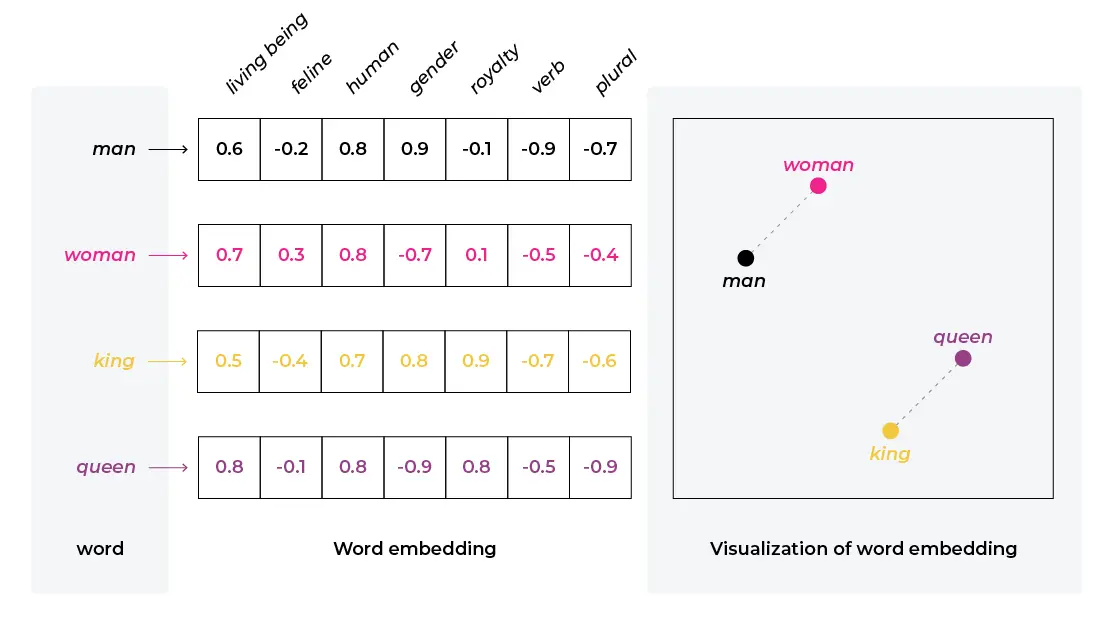

# Индексные (векторные) базы - что это и для чего используются

__Индексные базы__ (или индексные базы данных) — это структурированные наборы данных, используемые для быстрого поиска и извлечения информации. Они являются ключевым компонентом многих систем хранения данных, включая реляционные базы данных, системы управления контентом, поисковые системы и многие другие.

Основные особенности и применения индексных баз:

__Быстрый поиск__: Основное преимущество индексных баз — это возможность быстро находить нужные данные. Без индекса поиск данных может потребовать просмотр каждой записи в базе данных (полный перебор), что может быть очень медленным для больших объемов данных.

__Структура__: Индексы обычно строятся на основе определенных столбцов в таблице базы данных или определенных атрибутов в документе.

__Обновление и поддержание__: При добавлении, изменении или удалении данных из базы данных индексы также должны быть обновлены. Это может влиять на производительность, особенно при больших объемах операций.

__Поисковые системы__: Инвертированные индексы часто используются в поисковых системах для индексации слов в документах и быстрого поиска документов, содержащих определенные слова или фразы.

__Индексные базы__ — это мощный инструмент для ускорения доступа к данным. Однако важно правильно их использовать, учитывая затраты на их создание, обновление и хранение.

VectorStore в библиотеке langchain представляет собой интерфейс для хранилищ векторов. Эти хранилища используются для хранения векторных представлений данных, что позволяет выполнять быстрый и эффективный поиск по схожести в больших объемах данных.

Основные особенности и применения VectorStore:

Интерфейс: VectorStore предоставляет общий интерфейс для различных реализаций хранилищ векторов. Это может включать в себя различные базы данных или специализированные системы хранения векторов.

Использование в индексации: VectorStore может быть использован для индексации векторных представлений документов или других типов данных. Это позволяет быстро находить наиболее похожие элементы на основе векторного представления.

В целом, VectorStore в langchain предоставляет набор различных инструментов для эффективного хранения и поиска векторных представлений данных, что особенно полезно для задач, связанных с машинным обучением, анализом данных и поиском по схожести.

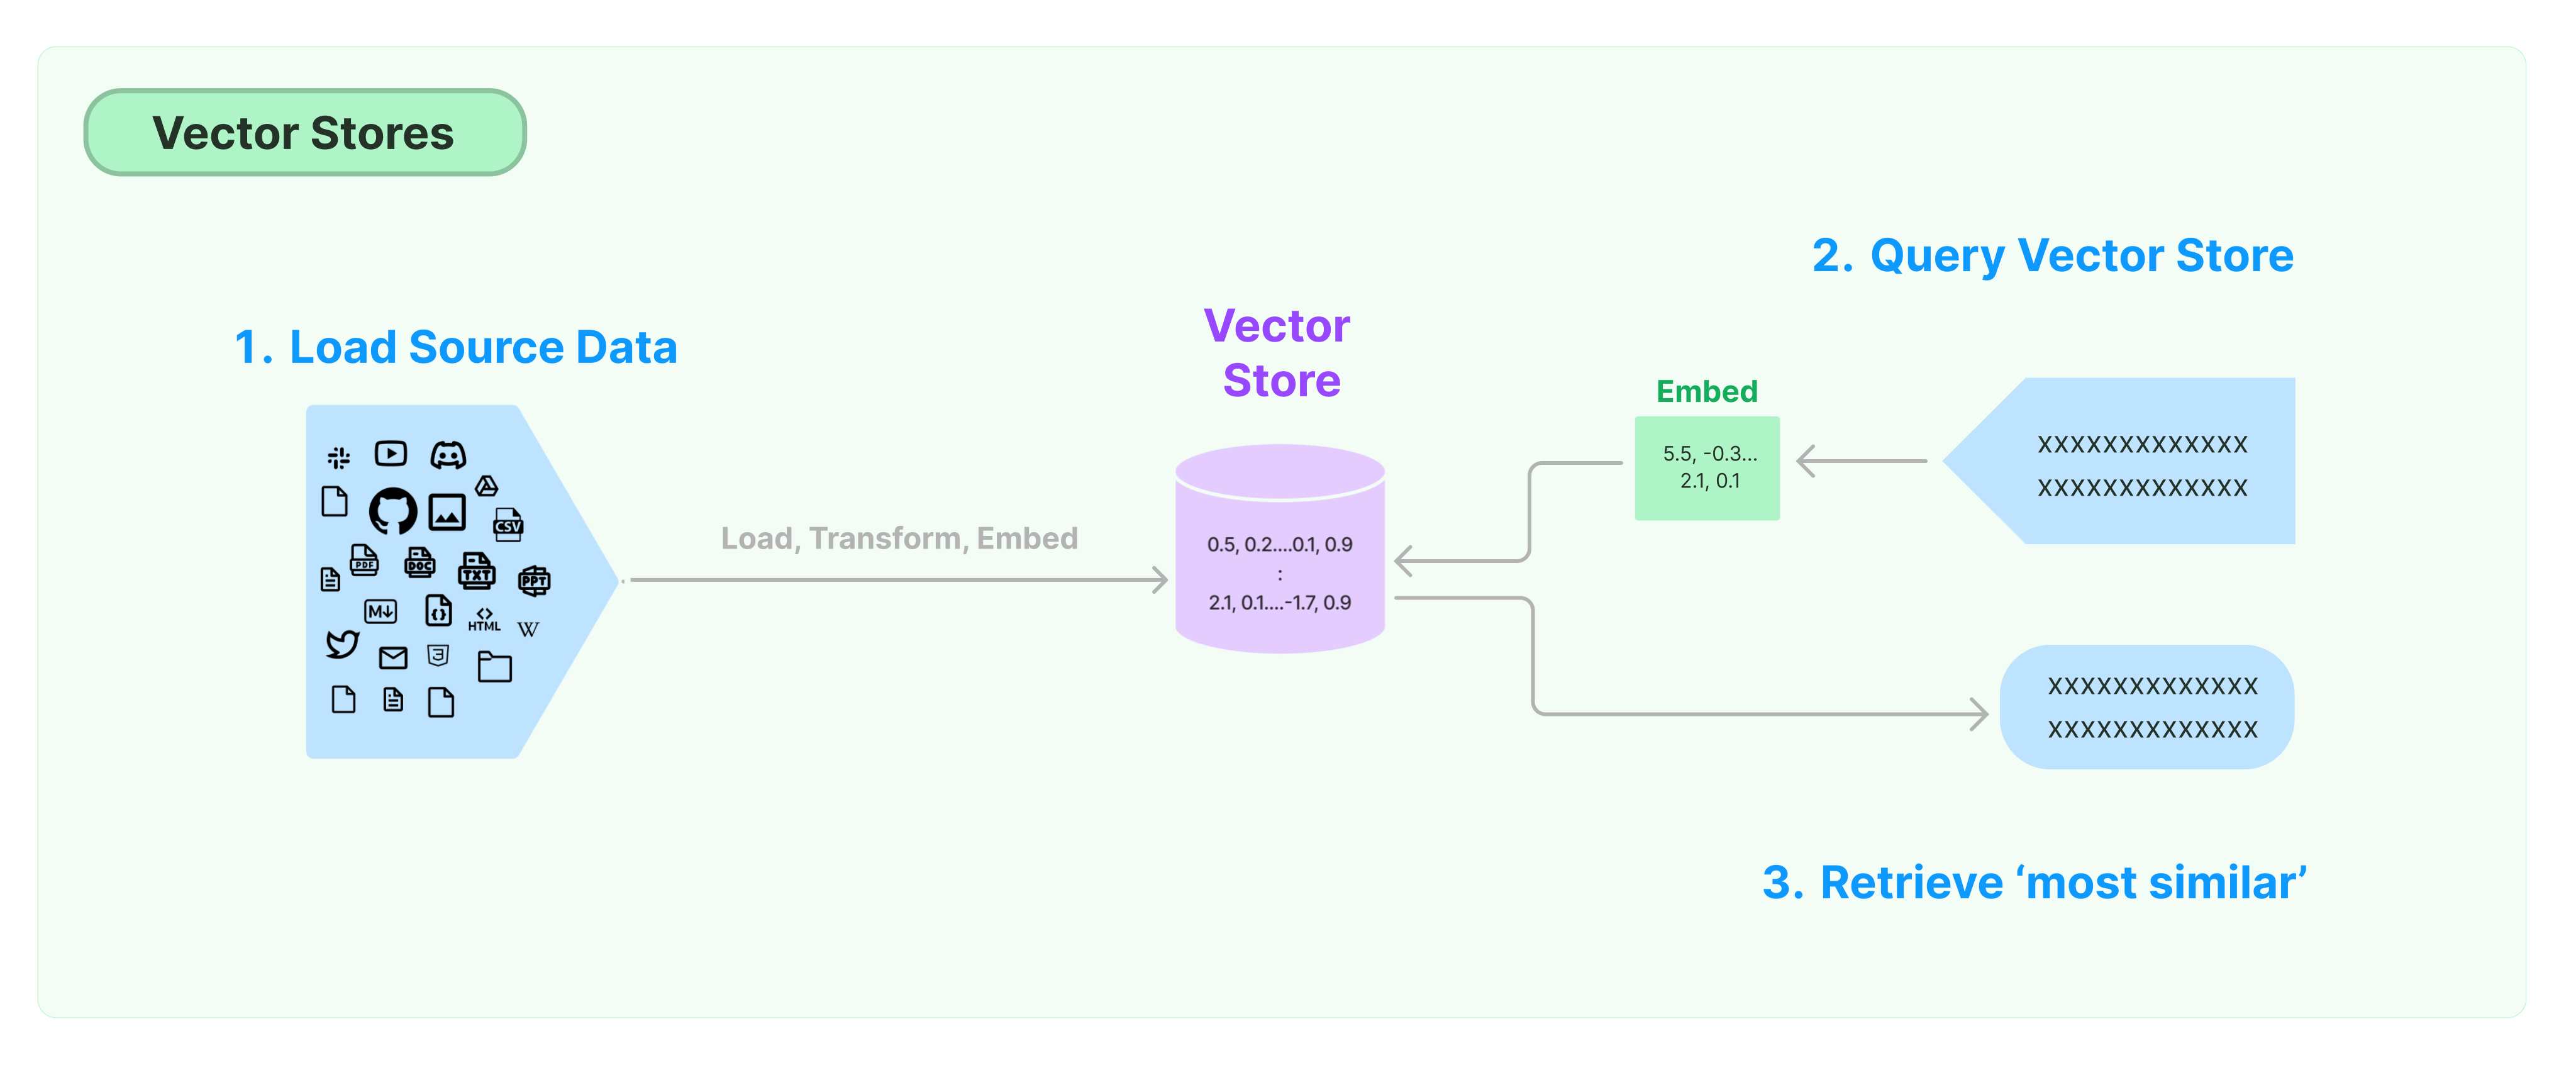

Вот тут можно найти более подробную информацию о доступных векторных хранилищах https://python.langchain.com/docs/modules/data_connection/vectorstores/


https://python.langchain.com/docs/integrations/vectorstores/

Для задач дообучения можно использовать различные векторные хранилища. Особенно хорошо себя проявило векторное хранилище __Facebook AI Similarity Search (Faiss)__ — это библиотека для эффективного поиска сходства и кластеризации плотных векторов. Он содержит алгоритмы поиска в наборах векторов любого размера, вплоть до таких, которые, возможно, не помещаются в оперативную память. Он также содержит вспомогательный код для оценки и настройки параметров.

In [ ]:
!pip install -q openai langchain langchain-openai langchain_community faiss-cpu

In [ ]:
# запустите эту ячейку, если НЕ используете секретный ключ в колабе
import os
import getpass
import openai

openai_key = getpass.getpass("OpenAI API Key:")
os.environ["OPENAI_API_KEY"] = openai_key
openai.api_key = openai_key

OpenAI API Key:··········


In [ ]:
# запустите эту ячейку, если используете секретный ключ в колабе
import openai

from openai import OpenAI
import os
from google.colab import userdata

os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

In [ ]:
client = OpenAI()

In [ ]:
from langchain_openai import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
import re
import requests
import openai
from langchain.docstore.document import Document

Текстовый документ можно загрузить разными способами, например, при помощи самописной функции, которая принимает на вход ссылку на гугл документ, а возвращает текст, который мы можем уже сохранить в переменную и использовать для создания векторной базы:

In [ ]:
# функция для загрузки документа по ссылке из гугл драйв
def load_document_text(url: str) -> str:
    # Extract the document ID from the URL
    match_ = re.search('/document/d/([a-zA-Z0-9-_]+)', url)
    if match_ is None:
        raise ValueError('Invalid Google Docs URL')
    doc_id = match_.group(1)

    # Download the document as plain text
    response = requests.get(f'https://docs.google.com/document/d/{doc_id}/export?format=txt')
    response.raise_for_status()
    text = response.text

    return text

In [ ]:
# База знаний, которая будет использоваться
data_from_url= load_document_text('https://docs.google.com/document/d/1ova0gprJGQ7_wYJhxEozpzZTgsGYYgyADeNOm-l7rfM')
data_from_url[:1000]

'\ufeffКАСКО в Simble теперь можно приобрести в рассрочку с картой Свобода\\n\\nТеперь КАСКО в Simble можно приобрести в рассрочку с картой Свобода от Банка Хоум Кредит. Карта Свобода предоставляет возможность делать покупки в рассрочку до 12 месяцев у партнеров или до 51 дня в любых магазинах. С помощью карты Свобода можно оформить КАСКО на короткий срок в приложении Simble. Узнать подробнее об условиях предложения и оформить карту Свобода можно [здесь](ссылка).\r\n\r\n\r\nSimble – КАСКО на короткий период\\n\\nSimble предлагает страховку на короткий период, которая позволяет застраховать автомобиль на 1 час поездки, 100 км пути или на время парковки. Стоимость страховки начинается от 14 ₽ в день. Также в приложении Simble можно оформить КАСКО на год поездки или парковку. Страховка на парковку предлагается по часам, начиная от 13 ₽ в час. Страховка на поездку предлагается по часам, начиная от 95 ₽ в час, или на любое количество километров, начиная от 175 ₽ за 100 км. Simble также пред

Далее нам необходимо разделить получившийся текст сплиттером на чанки. Выбор конкретного сплиттера во многом зависит от того, как у вас организованы данные в вашем документе, нет какого-то однозначного решения.

In [ ]:
source_chunks = []
splitter = CharacterTextSplitter(separator=" ",   # разделитель чанков (пробел)
                                 chunk_size=1024, # Количество символов
                                 chunk_overlap=0)

for chunk in splitter.split_text(data_from_url):
    source_chunks.append(Document(page_content=chunk, metadata={}))

In [ ]:
# всего получилось чанков:
len(source_chunks)

95

In [ ]:
# первый чанк
print(source_chunks[0])
page_content = source_chunks[0].page_content
# длина первого чанка
print(len(page_content))

page_content='﻿КАСКО в Simble теперь можно приобрести в рассрочку с картой Свобода\n\nТеперь КАСКО в Simble можно приобрести в рассрочку с картой Свобода от Банка Хоум Кредит. Карта Свобода предоставляет возможность делать покупки в рассрочку до 12 месяцев у партнеров или до 51 дня в любых магазинах. С помощью карты Свобода можно оформить КАСКО на короткий срок в приложении Simble. Узнать подробнее об условиях предложения и оформить карту Свобода можно [здесь](ссылка).


Simble – КАСКО на короткий период\n\nSimble предлагает страховку на короткий период, которая позволяет застраховать автомобиль на 1 час поездки, 100 км пути или на время парковки. Стоимость страховки начинается от 14 ₽ в день. Также в приложении Simble можно оформить КАСКО на год поездки или парковку. Страховка на парковку предлагается по часам, начиная от 13 ₽ в час. Страховка на поездку предлагается по часам, начиная от 95 ₽ в час, или на любое количество километров, начиная от 175 ₽ за 100 км. Simble также предлагае

In [ ]:
# Устанавливаем метаданные для первого чанка
source_chunks[0].metadata = {"teg": "раздел 1"}

# выводим на печать обновленные метаданные чанка
print(source_chunks[0].metadata)

{'teg': 'раздел 1'}


Для примера попробуем разделить текст при помощи RecursiveCharacterTextSplitter



In [ ]:
source_chunks=[]
splitter = RecursiveCharacterTextSplitter(chunk_size=1024,
                                          chunk_overlap=0)
for chunk in splitter.split_text(data_from_url):
    source_chunks.append(Document(page_content=chunk, metadata={"meta":"data"}))
len(source_chunks)

97

In [ ]:
source_chunks[0]

Document(metadata={'meta': 'data'}, page_content='\ufeffКАСКО в Simble теперь можно приобрести в рассрочку с картой Свобода\\n\\nТеперь КАСКО в Simble можно приобрести в рассрочку с картой Свобода от Банка Хоум Кредит. Карта Свобода предоставляет возможность делать покупки в рассрочку до 12 месяцев у партнеров или до 51 дня в любых магазинах. С помощью карты Свобода можно оформить КАСКО на короткий срок в приложении Simble. Узнать подробнее об условиях предложения и оформить карту Свобода можно [здесь](ссылка).')

Далее мы инициализирум модель эмбеддингов и создаем индексную базу faiss на основе наших чанков

In [ ]:
# Инициализирум модель эмбеддингов
embeddings = OpenAIEmbeddings()

# Создадим индексную базу из разделенных фрагментов текста
db = FAISS.from_documents(source_chunks, embeddings)

# Поиск текстов по схожести - с оценкой и без нее

Метод __similarity_search__ используется для поиска документов, которые наиболее похожи на заданный запрос на основе их векторных представлений (эмбеддингов). Этот метод принимает строковый запрос и другие параметры, такие как количество возвращаемых документов (k), и возвращает список наиболее релевантных документов.

Пример работы метода similarity_search на основе базы знаний компании Simble:

In [ ]:
query = "сколько стоит страховка на 1 день?"
docs = db.similarity_search(query, k=4)

print("**отрезок №1**", docs[0].page_content)
print("**отрезок №2**", docs[1].page_content)
print("**отрезок №3**", docs[2].page_content)
print("**отрезок №4**", docs[3].page_content)

**отрезок №1** Simble – КАСКО на короткий период\n\nSimble предлагает страховку на короткий период, которая позволяет застраховать автомобиль на 1 час поездки, 100 км пути или на время парковки. Стоимость страховки начинается от 14 ₽ в день. Также в приложении Simble можно оформить КАСКО на год поездки или парковку. Страховка на парковку предлагается по часам, начиная от 13 ₽ в час. Страховка на поездку предлагается по часам, начиная от 95 ₽ в час, или на любое количество километров, начиная от 175 ₽ за 100 км. Simble также предлагает тарифы для разных ситуаций, такие как страховка только от угона или страховка только на время парковки. 


Как оформить страховку в Simble
**отрезок №2** подскажем как сфотографировать машину для осмотра. 15 минут свободного времени вместо очередей и бумаг.\n\n## Страховка на любой вкус\n\n15 минут до работы или 15 часов до моря: отправляйтесь в путь, не переживая за авто. Мы разработали 3 тарифа для разных потребностей водителей. Выбирайте страховую комп

In [ ]:
query = "чем занимается компания simble?"
docs = db.similarity_search(query, k=4)

print("**отрезок №1**", docs[0].page_content)
print("**отрезок №2**", docs[1].page_content)
print("**отрезок №3**", docs[2].page_content)
print("**отрезок №4**", docs[3].page_content)

**отрезок №1** поездки. Также Simble сотрудничает с компаниями ООО "Зетта Страхование" и САО "ВСК", которые предоставляют страховые услуги на рынке более 30 лет.\n\nSimble разработал приложение, которое позволяет легко и удобно оформить страховку автомобиля. Пользователи могут выбрать подходящий тариф и купить полис через приложение.\n\n## Преимущества Simble:\n\n1. Ежедневная поддержка с 8:00 до 20:00. Команда Simble поможет в общении со страховой компанией и ответит на вопросы пользователей.\n2. Защита персональных данных. Приложение прошло аудит безопасности от компании Group-IB, специализирующейся на борьбе с киберпреступностью.\n3. Хорошие отзывы. Simble имеет положительные отзывы от партнеров и клиентов.\n4. Надежные партнеры. Simble сотрудничает с ООО "Зетта Страхование" и САО "ВСК", которые имеют более 30 миллионов клиентов в России.\n5. Крупные совместные проекты. Simble страхует проезд по платным дорогам ГК "Автодор", поездки в сервисе заказа премиальных автомобилей Wheely и 

In [ ]:
query = "как формируется рейтинг автовладельца?"
docs = db.similarity_search(query, k=4)

print("**отрезок №1**", docs[0].page_content)
print("**отрезок №2**", docs[1].page_content)
print("**отрезок №3**", docs[2].page_content)
print("**отрезок №4**", docs[3].page_content)

**отрезок №1** погоды. Вторая модель связана со стилем вождения, который анализируется аналитической платформой, и на основе этих данных формируется рейтинг автовладельца. Обе модели относятся к так называемому «умному страхованию». В Европе и США этот вид страхования работает с начала нулевых. В России потребители только знакомятся с такой моделью, но с учетом развития шеринг-экономики и тренда на разумное потребление, интерес к такому сервису стремительно растет.\n\n# Wheely\n\nWheely - цифровой сервис для заказа премиальных авто с водителями. Компания предоставляет свои услуги с 2010 года в Москве, Санкт-Петербурге, Сочи, Казани, Екатеринбурге, Краснодаре и Перми.\n\n# Simble\n\nSimble - мобильное приложение по страхованию автомобилей, запущенное компанией «Флексидрайв» в 2021 году. Сервис позволяет оформить КАСКО из расчета времени поездки, парковки или количества километров в пути. ООО «Флексидрайв» не оказывает услуги страхования, а услуги страхования оказывают ООО «Зетта Страхов

__Метод similarity_search_with_score__ предназначен для поиска документов, которые наиболее похожи на заданный запрос, и возвращает не только сами документы, но и их "оценки" или "релевантность" по отношению к запросу. Эти оценки основаны на метрике Евклидово расстояние, и представляют собой числовое значение, которое указывает на степень сходства между запросом и каждым документом.

In [ ]:
query = "чем занимается компания simble?"
docs_and_scores = db.similarity_search_with_score(query, k=4)

In [ ]:
docs_and_scores[0]

(Document(id='8ab96c8a-a1da-44f6-88b1-9e243acc2e42', metadata={'meta': 'data'}, page_content='поездки. Также Simble сотрудничает с компаниями ООО "Зетта Страхование" и САО "ВСК", которые предоставляют страховые услуги на рынке более 30 лет.\\n\\nSimble разработал приложение, которое позволяет легко и удобно оформить страховку автомобиля. Пользователи могут выбрать подходящий тариф и купить полис через приложение.\\n\\n## Преимущества Simble:\\n\\n1. Ежедневная поддержка с 8:00 до 20:00. Команда Simble поможет в общении со страховой компанией и ответит на вопросы пользователей.\\n2. Защита персональных данных. Приложение прошло аудит безопасности от компании Group-IB, специализирующейся на борьбе с киберпреступностью.\\n3. Хорошие отзывы. Simble имеет положительные отзывы от партнеров и клиентов.\\n4. Надежные партнеры. Simble сотрудничает с ООО "Зетта Страхование" и САО "ВСК", которые имеют более 30 миллионов клиентов в России.\\n5. Крупные совместные проекты. Simble страхует проезд по

In [ ]:
# первый фрагмент
print("Контент: ", docs_and_scores[0][0].page_content)
print("Оценка расстояния: ", docs_and_scores[0][1])

Контент:  поездки. Также Simble сотрудничает с компаниями ООО "Зетта Страхование" и САО "ВСК", которые предоставляют страховые услуги на рынке более 30 лет.\n\nSimble разработал приложение, которое позволяет легко и удобно оформить страховку автомобиля. Пользователи могут выбрать подходящий тариф и купить полис через приложение.\n\n## Преимущества Simble:\n\n1. Ежедневная поддержка с 8:00 до 20:00. Команда Simble поможет в общении со страховой компанией и ответит на вопросы пользователей.\n2. Защита персональных данных. Приложение прошло аудит безопасности от компании Group-IB, специализирующейся на борьбе с киберпреступностью.\n3. Хорошие отзывы. Simble имеет положительные отзывы от партнеров и клиентов.\n4. Надежные партнеры. Simble сотрудничает с ООО "Зетта Страхование" и САО "ВСК", которые имеют более 30 миллионов клиентов в России.\n5. Крупные совместные проекты. Simble страхует проезд по платным дорогам ГК "Автодор", поездки в сервисе заказа премиальных автомобилей Wheely и на мо

In [ ]:
# второй фрагмент
print("Контент: ", docs_and_scores[1][0].page_content)
print("Оценка расстояния: ", docs_and_scores[1][1])

Контент:  Гибкое начало рабочего дня с возможностью работать удаленно по пятницам.\n- Оформление по ТК РФ.\n- Удобное месторасположение офиса - м. Улица 1905 года, м. Выставочная.\n- Работу в просторном офисе в центре рядом с парком, где можно прогуляться в обеденное время.\n- Дружную команду, нацеленную на бизнес-результат и клиента.\n\n### Контакты для отклика:\nЖдем от вас сопроводительное письмо, в котором вы расскажите, чем для вас интересна работа в Simble. \nEmail: t.mishina@simble.in\n\n## Партнерство\n\n### Simble - новый партнер hhland.ru\nhhland.ru - уникальная программа лояльности для компаний и их сотрудников. С помощью неё можно получать скидки и актуальные предложения в разных сферах: от еды и ресторанов до отдыха и недвижимости. Пользователи hhland.ru теперь могут оформить КАСКО на короткий срок в приложении Simble по особым выгодным условиям. Подключиться к программе лояльности можно на сайте hhland.ru.\n\n## Новости\n\n### Simble выиграл в номинации «Приложение года» 

# Дообучение ChatGPT на основе базы знаний компании Simble

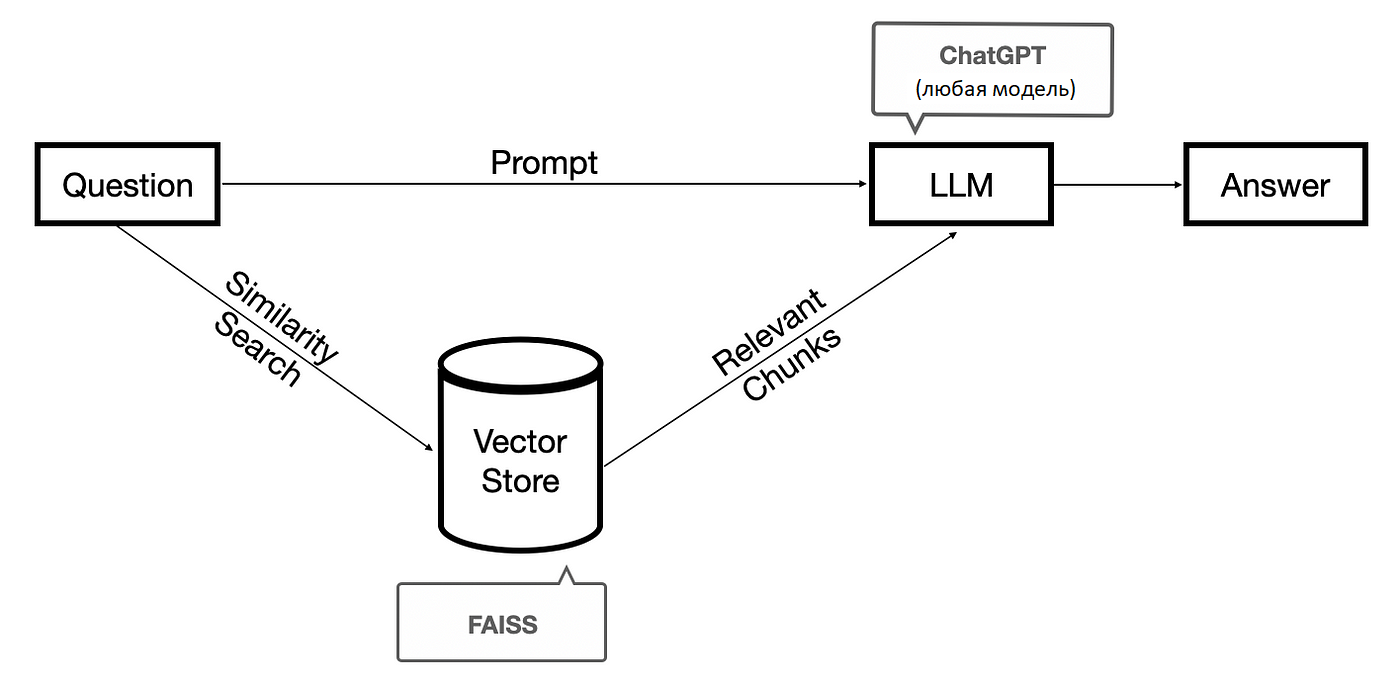

In [ ]:
from openai import OpenAI
import textwrap


# Функция для форматирования текста по абзацам
def format_text(text, width=120):
    # Разделяем текст на абзацы
    paragraphs = text.split('\n')
    # Форматируем каждый абзац отдельно
    formatted_paragraphs = []
    for paragraph in paragraphs:
        # Используем textwrap.fill для форматирования абзаца, чтобы длина строки не превышала width
        formatted_paragraph = textwrap.fill(paragraph, width)
        formatted_paragraphs.append(formatted_paragraph)
    # Объединяем абзацы с символом новой строки
    return '\n'.join(formatted_paragraphs)


def answer_index(system, topic, search_index, verbose=True):
    # Поиск релевантных отрезков из базы знаний
    docs = search_index.similarity_search(topic, k=4)
    if verbose: print('\n ===========================================: ')
    message_content = re.sub(r'\n{2}', ' ', '\n '.join(
        [f'\nОтрывок документа №{i+1}\n=====================' + doc.page_content + '\n' for i, doc in enumerate(docs)]))
    if verbose: print('message_content :\n ======================================== \n', message_content)
    client = OpenAI()
    messages = [
        {"role": "system", "content": system},
        {"role": "user",
         "content": f"Ответь на вопрос клиента. Не упоминай документ с информацией для ответа клиенту \
         в ответе. Документ с информацией для ответа клиенту: {message_content} \
         \n\nВопрос клиента: \n{topic}"}
    ]
    if verbose: print('\n ===========================================: ')
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages,
        temperature=0
    )
    answer = completion.choices[0].message.content
    return answer  # возвращает ответ

In [ ]:
system = "Ты-консультант в компании Simble, ответь на вопрос клиента на основе документа с информацией. \
Не придумывай ничего от себя, отвечай максимально по документу. Не упоминай Документ с информацией для \
ответа клиенту. Клиент ничего не должен знать про Документ с информацией для ответа клиенту"

In [ ]:
# вопрос пользователя
topic = "На какой минимальный срок можно оформить КАСКО?"
ans = answer_index(system, topic, db)
print(format_text(ans))


 ===========================================: 
message_content :
 
Отрывок документа №1
=====================предлагается кэшбэк 10% на счет Tele2 за регистрацию и покупку полиса КАСКО по промокоду.\n\n# Вопросы и ответы\n\n- Что такое КАСКО на короткий срок?\nКАСКО на короткий срок - это новый формат автострахования от сервиса Simble. Он позволяет оформить полис на нужный вам период (на время поездки или парковки, километры в пути) и не переплачивать за годовое КАСКО.\n\n- Можно ли застраховать не свой автомобиль?\nДа, можно. При страховом случае страховая компания попросит документы собственника автомобиля, и возмещение ущерба всегда получает собственник автомобиля.\n\n- Можно ли оформить страховку на каршеринговую машину?\nНет, к сожалению, нельзя. Автомобиль должен быть оформлен на физическое лицо, и к страхованию допускаются только физические лица.\n\n# Simble представил мгновенное КАСКО совместно с каршерингом Cars7\n\nSimble и каршеринг Cars7 представили возможность мгновенного

In [ ]:
# вопрос пользователя
topic = "Сколько стоит Каско на 1 час поездки?"
ans = answer_index(system, topic, db)
print(format_text(ans))


 ===========================================: 
message_content :
 
Отрывок документа №1
=====================Simble – КАСКО на короткий период\n\nSimble предлагает страховку на короткий период, которая позволяет застраховать автомобиль на 1 час поездки, 100 км пути или на время парковки. Стоимость страховки начинается от 14 ₽ в день. Также в приложении Simble можно оформить КАСКО на год поездки или парковку. Страховка на парковку предлагается по часам, начиная от 13 ₽ в час. Страховка на поездку предлагается по часам, начиная от 95 ₽ в час, или на любое количество километров, начиная от 175 ₽ за 100 км. Simble также предлагает тарифы для разных ситуаций, такие как страховка только от угона или страховка только на время парковки. 


Как оформить страховку в Simble  
Отрывок документа №2
=====================клиенты могут оформить КАСКО на короткий срок от Simble с приятным бонусом.\n\nАвтоклуб А24 — лучший друг автомобилиста на дороге. А24 поможет с эвакуацией, тех. помощью и ремонтом 

In [ ]:
# вопрос пользователя
topic = "Что нужно для оформления полиса?"
ans = answer_index(system, topic, db)
print(format_text(ans))


 ===========================================: 
message_content :
 
Отрывок документа №1
=====================условиям и легитимности полностью идентичен бумажному. Разница только в оформлении: электронный документ приходит на почту в виде файла. Распечатывать его не обязательно, а сотрудникам ГИБДД можно предъявить полис в электронном варианте, например на смартфоне или планшете. Электронный полис можно и распечатать, если так удобнее.\n\n- Как убедиться, что полис настоящий?\n - Самый простой способ – ввести серию и номер полиса в соответствующую форму на сайте Российского Союза Автостраховщиков. Также можно обратиться напрямую в страховую компанию, в которой было куплено ОСАГО, и узнать, зарегистрирован ли полис в базе данных компании.\n\n- Что делать, если полис не пришёл на почту?\n - Полис приходит на почту сразу. Но если вы его не получили, напишите нам на почту support@simble.in или позвоните на линию поддержки 8 800 201-74-41, мы возьмём общение со страховыми на себя и поможем

# Консультант по базе знаний с поддержкой контекста предыдущей переписки

In [ ]:
# Обновленная функция взаимодействия с индексной базой, OpenAI и историей переписки
def answer_index_history(system, query, history, db_index,
                         model="gpt-4o-mini", verbose=False):
    # Поиск релевантных отрезков из базы знаний
    docs = db_index.similarity_search(query, k=5)
    message_content = re.sub(r'\n{2}', ' ', '\n '.join(
        [f'\nОтрывок документа №{i+1}\n' + doc.page_content + '\n' for i, doc in enumerate(docs)]))
    if verbose: print('\n\n', message_content)
    messages = [
        {"role": "system", "content": system},
        {"role": "user",
         "content":
         f"Ответь на вопрос клиента. Не упоминай документ с информацией для ответа клиенту в ответе. \
         Документ с информацией для ответа клиенту: \n\n{message_content} \
         \n\nИстория диалога: \n{history} \
         \n\nВопрос клиента: \n{query}"}
    ]
    completion = openai.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0
    )
    return completion.choices[0].message.content # возвращает ответ

In [ ]:
# Для диалога используем цикл

history = ""
while True:
    query = input('Вопрос пользователя: ')
    # выход из цикла, если пользователь ввел: 'стоп'
    if query == 'стоп': break
    # ответ от OpenAI
    answer = answer_index_history(system, query, history, db)
    print(f'Ответ:\n{format_text(answer)}\n')
    # Запись истории диалога
    history += f'Вопрос пользователя: {query}. \nОтвет: {answer}\n'

Вопрос пользователя: На какой минимальный срок можно оформить КАСКО?
Ответ:
Минимальный срок, на который можно оформить КАСКО, составляет один день. Вы можете выбрать срок действия страховки
самостоятельно, в зависимости от ваших потребностей, например, на время поездки или парковки.

Вопрос пользователя: Сколько стоит Каско на 1 час поездки?
Ответ:
Стоимость КАСКО на 1 час поездки начинается от 95 ₽.

Вопрос пользователя: Что нужно для оформления полиса?
Ответ:
Для оформления полиса необходимо зарегистрироваться и указать свои данные, а также данные о вашем автомобиле. Если у вас
уже есть автомобиль, вы можете найти его по номеру или указать данные ПТС. Если у вас ещё нет автомобиля, вам нужно
пройти фотоосмотр и сфотографировать машину со всех сторон. Это нужно сделать только один раз, при первой покупке.

Вопрос пользователя: Есть номер телефона, куда я могу позвонить? Саммаризируй свои предыдущие ответы и выведи по пунктам
Ответ:
Да, у нас есть номер телефона, по которому вы можете